winery                object
wine                  object
year                  object
rating               float64
number of reviews      int64
region                object
price                float64
type of wine          object
body                 float64
acidity              float64
dtype: object


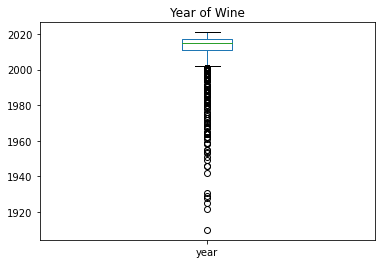

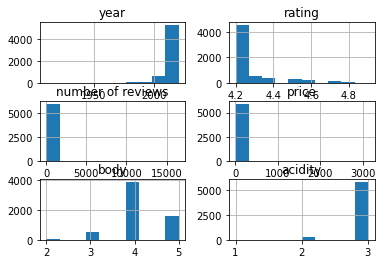

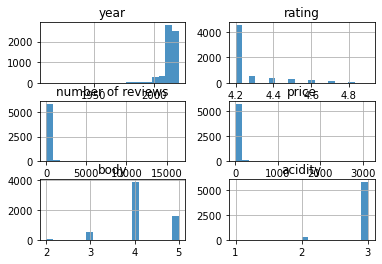

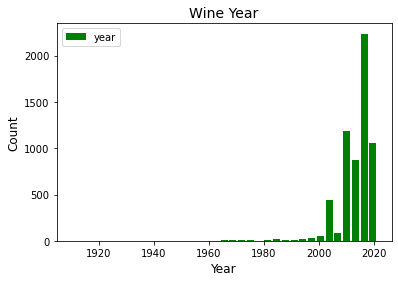

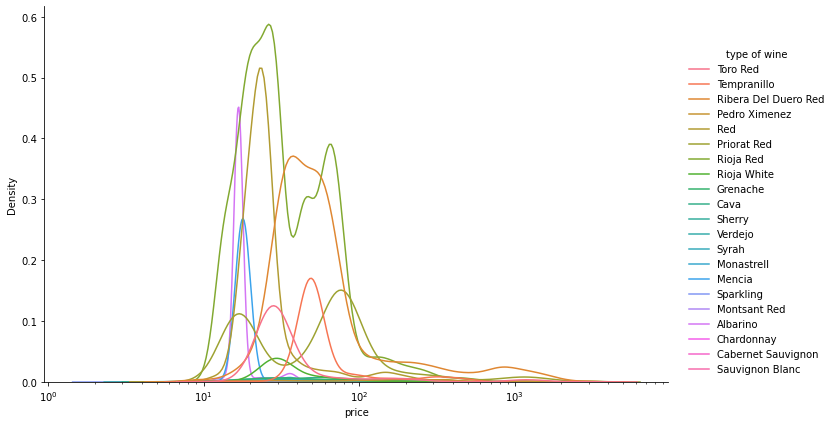

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

df1=pd.read_csv("wines_SPA.csv")

                                            #Data Wrangling                           
df=df1.dropna()
df=df1.dropna(axis=0).drop("country",axis=1)
df=df[(df.year != "N.V.") & (df.price != "N.V.")]
df.rename(columns={"num_reviews":"number of reviews","type":"type of wine"},inplace=True)

#Number of wineries
Num_wineries=df["winery"].value_counts()

#Number of Wineries located in each region
Num_wineries_region=df.groupby("region")["winery"].count()

#List all the types of wine by regions
Type_wine=df.groupby("region")["type of wine"].sum()

#Average price for each wine year(grapes were harvested)
Avg_price=df.groupby("year")["price"].mean()

#Find the 1000 highest prices
Top_prices=df.nlargest(100,"price",keep="first")

#Select rows in where acidityrating is <= 2 
bad_quality=df[(df["acidity"]<=2)]

#Select specific winery with their shown data - boolean array
Vega_winery=df.loc[df["winery"]=="Vega Sicilia"]
Vega_winery1=df.loc[df["winery"]=="Vega Sicilia",["wine","year","price"]]

                                            # Data Visualisation

#Datatype of each column in dataframe
datatype=df.dtypes
print(datatype)

#Column 'year' is object so convert to numeric/float to allow for plot
df['year']=df['year'].astype(float)


#Boxplot - Distribution of Wine year
boxplotyear=df["year"].plot(kind='box', title="Year of Wine")


#Histogram - basic histogram for all columns with discreet values
df.hist()
df.hist(bins=20, alpha=0.8)


#Histogram - year column
df.hist(column="year",bins=35, grid=False, legend=True, rwidth=.8,color="green")
plt.title ("Wine Year", fontsize=14)
plt.xlabel ("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


#KDE plot - How wine prices change dependent on the type of wine - seaborn
sns.displot(data=df,x="price",hue="type of wine",kind="kde",height=6,
             aspect=1.6,log_scale=10)
